In [77]:
from typing import Tuple
import pandas as pd
import numpy as np

from pathlib import Path
from matplotlib import pyplot, image

In [78]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
def returnAnnotations(file_attributos, file_annotations):
  df_attributes = pd.read_csv(file_attributos, header = None)
  list_attributes = list()
  list_attributes.append(df_attributes[0].values)
  handle = open(file_annotations)
  scores = dict()
  confidence = dict()
  for line in handle:
      words = line.split()
      i=0
      for word in words:
          if i == 0:
              scores[word]=list()
              confidence[word] = list()
              i+=1
          else:
              values = word.split(',')
              scores[words[0]].append(float(values[0]))
              confidence[words[0]].append(float(values[1]))
              i+=1
  scores = pd.DataFrame(scores).T
  scores.columns = list_attributes
  confidence = pd.DataFrame(confidence).T
  confidence.columns = list_attributes
  return scores,confidence


In [80]:
file_attributos = '/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/annotations/attributes.txt'
file_annotations = '/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/annotations/annotations.tsv'
file_training = '/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/holdout_split/training.txt'
file_test = '/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/holdout_split/test.txt'
def returnTrainingTest(file_attributos, file_annotations, file_training, file_test):
  scores,confidence = returnAnnotations(file_attributos, file_annotations)
  df_training = pd.read_csv(file_training, header = None)
  df_test = pd.read_csv(file_test, header = None)
  scores_training = scores[scores.index.isin(df_training[0].values)]
  scores_test = scores[scores.index.isin(df_test[0].values)]
  confidence_training = confidence[confidence.index.isin(df_training[0].values)]
  confidence_test = confidence[confidence.index.isin(df_test[0].values)]
  return scores_training, scores_test, confidence_training, confidence_test

In [81]:
scores_training, scores_test, confidence_training, confidence_test = returnTrainingTest(file_attributos, file_annotations, file_training, file_test)

In [82]:
scores_training

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,0.213370,0.83585,0.138240,0.164860,0.624940,0.386150,0.339510,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.23348,0.129520,0.057863,0.119120,0.095998,0.630750,0.410520,0.175360
00000064/101.jpg,0.087876,0.86553,0.038267,0.046497,0.062170,1.000000,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.66869,0.078056,0.392200,0.124100,0.141060,0.018542,0.142430,0.388870
00000064/106.jpg,0.231350,0.73344,0.038267,0.164860,0.118550,0.386150,0.564970,0.019698,0.493610,0.023848,...,0.022540,0.49180,0.32528,0.013640,0.057863,0.025097,0.095998,0.687330,0.419110,0.047206
00000064/107.jpg,0.406980,0.56384,0.862520,0.164860,0.800930,0.043308,0.188200,0.156150,0.023172,0.046109,...,0.022540,0.49180,0.14167,0.378730,0.057863,0.069622,0.177450,0.780870,0.533500,0.047206
00000064/109.jpg,0.257200,0.25579,0.686770,0.046497,0.551150,0.043308,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.56672,0.51443,0.013640,0.165460,0.124100,0.267560,0.018542,0.499370,0.047206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,0.081369,1.00000,0.032815,0.005487,0.022595,1.000000,0.146520,0.051587,0.000000,0.022788,...,0.044502,0.18885,0.29076,0.032437,0.047200,0.037370,0.247540,0.000000,0.073662,0.036722
90000014/92.jpg,0.019562,0.94944,0.032815,0.005487,0.191390,0.449780,0.293900,0.051587,0.136960,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.247540,0.000000,0.073662,0.277750
90000014/93.jpg,0.019562,0.94944,0.032815,0.092225,0.064793,0.559590,0.293900,0.051587,0.064861,0.071293,...,0.044502,0.18885,0.40882,0.094569,0.168960,0.032379,0.172280,0.028431,0.073662,0.277750
90000014/95.jpg,0.019562,0.94944,0.032815,0.005487,0.444570,0.449780,0.091672,0.051587,0.041245,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.172280,0.000000,0.073662,0.337680


In [83]:
scores_test

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,0.78485,0.13722,0.154100,0.040839,0.212650,0.016391,1.000000,0.860690,0.763550,0.660870,...,0.146090,0.71623,0.184200,0.941410,0.013662,0.053484,0.081992,0.409010,0.79530,0.107840
00000090/10.jpg,0.78485,0.24387,0.154100,0.357350,0.244340,0.016391,0.962260,0.690630,0.143310,0.023285,...,0.146090,0.51145,0.081465,0.739920,0.013662,0.053484,0.040081,0.409010,0.73766,0.198510
00000090/104.jpg,0.42252,0.94661,0.203790,0.040839,0.055406,0.375890,0.560730,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.205130,0.058799,0.219860,0.053484,0.081992,0.054612,0.35821,0.057435
00000090/105.jpg,0.08370,0.94661,0.154100,0.088234,0.055406,0.791360,0.012467,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.484650,0.058799,0.225320,0.053484,0.040081,0.054612,0.15082,0.148100
00000090/107.jpg,0.43993,0.60259,0.253480,0.350100,0.502940,0.016391,0.290090,0.415420,0.326540,0.023285,...,0.140700,0.67882,0.081465,0.622540,0.013662,0.053484,0.040081,0.175380,0.61165,0.107840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,0.11458,0.12450,0.602250,0.853060,0.665520,0.026988,0.030991,0.116580,0.174340,0.000000,...,0.164850,0.77773,0.068099,0.508590,0.450080,0.379310,0.699290,0.666160,0.71806,0.275820
90000013/86.jpg,0.11458,0.85071,0.092844,0.274790,0.217740,0.661940,0.155460,0.044431,0.127690,0.025132,...,0.033395,0.78439,0.203710,0.433350,0.675170,0.112220,0.596450,0.309020,0.01687,0.275820
90000013/89.jpg,0.24364,0.94378,0.067642,0.063162,0.311270,0.779310,0.030991,0.193780,0.090742,0.157640,...,0.033395,0.78439,0.181070,0.508590,0.723740,0.024025,0.512830,0.522520,0.24085,0.275820
90000013/9.jpg,0.22422,0.12450,0.696000,0.641430,0.682600,0.026988,0.137420,0.116580,0.174340,0.058260,...,0.033395,0.67587,0.294050,0.666620,0.450080,0.435830,0.914420,0.626840,0.53489,0.275820


In [84]:
confidence_training

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
00000064/101.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
00000064/106.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
00000064/107.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,5.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
00000064/109.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,5.0,6.0,6.0,6.0,6.0,6.0,7.0,5.0,5.0,6.0,...,7.0,5.0,6.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0
90000014/92.jpg,5.0,6.0,6.0,6.0,6.0,6.0,7.0,5.0,5.0,6.0,...,7.0,5.0,6.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0
90000014/93.jpg,5.0,6.0,6.0,6.0,6.0,6.0,7.0,5.0,5.0,6.0,...,7.0,5.0,6.0,6.0,5.0,4.0,5.0,6.0,6.0,6.0
90000014/95.jpg,5.0,6.0,6.0,6.0,6.0,6.0,7.0,5.0,5.0,6.0,...,7.0,5.0,6.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0


In [85]:
confidence_test

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,6.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
00000090/10.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,5.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
00000090/104.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,6.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
00000090/105.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,6.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
00000090/107.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,6.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,5.0,7.0,7.0,6.0,5.0,6.0,5.0,7.0,8.0,6.0,...,6.0,7.0,6.0,7.0,6.0,5.0,5.0,9.0,6.0,6.0
90000013/86.jpg,5.0,7.0,7.0,6.0,5.0,6.0,5.0,7.0,8.0,6.0,...,6.0,7.0,6.0,7.0,6.0,5.0,5.0,9.0,6.0,6.0
90000013/89.jpg,5.0,7.0,7.0,6.0,5.0,6.0,5.0,7.0,8.0,6.0,...,6.0,7.0,6.0,7.0,6.0,5.0,5.0,9.0,6.0,6.0
90000013/9.jpg,5.0,7.0,7.0,6.0,5.0,6.0,5.0,7.0,8.0,6.0,...,6.0,7.0,6.0,7.0,6.0,5.0,5.0,9.0,6.0,6.0


In [86]:
confidence_training = confidence_training.apply(lambda x: [0 if y <= 5 else 1 for y in x])
confidence_training

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,1,1,1,0,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
00000064/101.jpg,1,1,1,0,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
00000064/106.jpg,1,1,1,0,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
00000064/107.jpg,1,1,1,0,1,0,0,1,1,0,...,0,1,1,0,1,1,1,1,1,1
00000064/109.jpg,1,1,1,0,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,0,1,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,1,1,1
90000014/92.jpg,0,1,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,1,1,1
90000014/93.jpg,0,1,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,1,1,1
90000014/95.jpg,0,1,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,1,1,1


In [87]:
confidence_test = confidence_test.apply(lambda x: [0 if y <= 5 else 1 for y in x])
confidence_test

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,1,1,0,0,0
00000090/10.jpg,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,0,0,0
00000090/104.jpg,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,1,1,0,0,0
00000090/105.jpg,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,1,1,0,0,0
00000090/107.jpg,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,0,1,1,1,0,1,0,1,1,1,...,1,1,1,1,1,0,0,1,1,1
90000013/86.jpg,0,1,1,1,0,1,0,1,1,1,...,1,1,1,1,1,0,0,1,1,1
90000013/89.jpg,0,1,1,1,0,1,0,1,1,1,...,1,1,1,1,1,0,0,1,1,1
90000013/9.jpg,0,1,1,1,0,1,0,1,1,1,...,1,1,1,1,1,0,0,1,1,1


In [88]:
#df_training = pd.DataFrame(scores_training*confidence_training, columns=scores_training.columns, index=scores_training.index)
df_training = scores_training
df_training.columns = df_training.columns.get_level_values(0)
df_training

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,0.213370,0.83585,0.138240,0.164860,0.624940,0.386150,0.339510,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.23348,0.129520,0.057863,0.119120,0.095998,0.630750,0.410520,0.175360
00000064/101.jpg,0.087876,0.86553,0.038267,0.046497,0.062170,1.000000,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.66869,0.078056,0.392200,0.124100,0.141060,0.018542,0.142430,0.388870
00000064/106.jpg,0.231350,0.73344,0.038267,0.164860,0.118550,0.386150,0.564970,0.019698,0.493610,0.023848,...,0.022540,0.49180,0.32528,0.013640,0.057863,0.025097,0.095998,0.687330,0.419110,0.047206
00000064/107.jpg,0.406980,0.56384,0.862520,0.164860,0.800930,0.043308,0.188200,0.156150,0.023172,0.046109,...,0.022540,0.49180,0.14167,0.378730,0.057863,0.069622,0.177450,0.780870,0.533500,0.047206
00000064/109.jpg,0.257200,0.25579,0.686770,0.046497,0.551150,0.043308,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.56672,0.51443,0.013640,0.165460,0.124100,0.267560,0.018542,0.499370,0.047206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,0.081369,1.00000,0.032815,0.005487,0.022595,1.000000,0.146520,0.051587,0.000000,0.022788,...,0.044502,0.18885,0.29076,0.032437,0.047200,0.037370,0.247540,0.000000,0.073662,0.036722
90000014/92.jpg,0.019562,0.94944,0.032815,0.005487,0.191390,0.449780,0.293900,0.051587,0.136960,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.247540,0.000000,0.073662,0.277750
90000014/93.jpg,0.019562,0.94944,0.032815,0.092225,0.064793,0.559590,0.293900,0.051587,0.064861,0.071293,...,0.044502,0.18885,0.40882,0.094569,0.168960,0.032379,0.172280,0.028431,0.073662,0.277750
90000014/95.jpg,0.019562,0.94944,0.032815,0.005487,0.444570,0.449780,0.091672,0.051587,0.041245,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.172280,0.000000,0.073662,0.337680


In [89]:
#df_test = pd.DataFrame(scores_test*confidence_test, columns=scores_test.columns, index=scores_test.index)
df_test = scores_test
df_test.columns = df_test.columns.get_level_values(0)
df_test

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,0.78485,0.13722,0.154100,0.040839,0.212650,0.016391,1.000000,0.860690,0.763550,0.660870,...,0.146090,0.71623,0.184200,0.941410,0.013662,0.053484,0.081992,0.409010,0.79530,0.107840
00000090/10.jpg,0.78485,0.24387,0.154100,0.357350,0.244340,0.016391,0.962260,0.690630,0.143310,0.023285,...,0.146090,0.51145,0.081465,0.739920,0.013662,0.053484,0.040081,0.409010,0.73766,0.198510
00000090/104.jpg,0.42252,0.94661,0.203790,0.040839,0.055406,0.375890,0.560730,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.205130,0.058799,0.219860,0.053484,0.081992,0.054612,0.35821,0.057435
00000090/105.jpg,0.08370,0.94661,0.154100,0.088234,0.055406,0.791360,0.012467,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.484650,0.058799,0.225320,0.053484,0.040081,0.054612,0.15082,0.148100
00000090/107.jpg,0.43993,0.60259,0.253480,0.350100,0.502940,0.016391,0.290090,0.415420,0.326540,0.023285,...,0.140700,0.67882,0.081465,0.622540,0.013662,0.053484,0.040081,0.175380,0.61165,0.107840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,0.11458,0.12450,0.602250,0.853060,0.665520,0.026988,0.030991,0.116580,0.174340,0.000000,...,0.164850,0.77773,0.068099,0.508590,0.450080,0.379310,0.699290,0.666160,0.71806,0.275820
90000013/86.jpg,0.11458,0.85071,0.092844,0.274790,0.217740,0.661940,0.155460,0.044431,0.127690,0.025132,...,0.033395,0.78439,0.203710,0.433350,0.675170,0.112220,0.596450,0.309020,0.01687,0.275820
90000013/89.jpg,0.24364,0.94378,0.067642,0.063162,0.311270,0.779310,0.030991,0.193780,0.090742,0.157640,...,0.033395,0.78439,0.181070,0.508590,0.723740,0.024025,0.512830,0.522520,0.24085,0.275820
90000013/9.jpg,0.22422,0.12450,0.696000,0.641430,0.682600,0.026988,0.137420,0.116580,0.174340,0.058260,...,0.033395,0.67587,0.294050,0.666620,0.450080,0.435830,0.914420,0.626840,0.53489,0.275820


In [90]:
path_img = Path('/content/drive/My Drive/courses/mdc/dados/trabalho_final/Predição de Atributos Visuais/imageLD')
import os
def returnPathImages():
    imageLD = {}
    datasets = os.listdir(path_img)
    for dataset in datasets:
        imgs_name = os.listdir(path_img/Path(dataset))
        for name in imgs_name:
            img_file = path_img/Path(dataset)/Path(name)
            imageLD[str(Path(dataset)/Path(name))]=img_file
    return imageLD

In [91]:
images_paths = returnPathImages()

In [92]:
df_training_image = df_training[df_training.index.isin(images_paths.keys())]
df_training_image

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,0.213370,0.83585,0.138240,0.164860,0.624940,0.386150,0.339510,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.23348,0.129520,0.057863,0.119120,0.095998,0.630750,0.410520,0.175360
00000064/101.jpg,0.087876,0.86553,0.038267,0.046497,0.062170,1.000000,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.66869,0.078056,0.392200,0.124100,0.141060,0.018542,0.142430,0.388870
00000064/106.jpg,0.231350,0.73344,0.038267,0.164860,0.118550,0.386150,0.564970,0.019698,0.493610,0.023848,...,0.022540,0.49180,0.32528,0.013640,0.057863,0.025097,0.095998,0.687330,0.419110,0.047206
00000064/107.jpg,0.406980,0.56384,0.862520,0.164860,0.800930,0.043308,0.188200,0.156150,0.023172,0.046109,...,0.022540,0.49180,0.14167,0.378730,0.057863,0.069622,0.177450,0.780870,0.533500,0.047206
00000064/109.jpg,0.257200,0.25579,0.686770,0.046497,0.551150,0.043308,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.56672,0.51443,0.013640,0.165460,0.124100,0.267560,0.018542,0.499370,0.047206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,0.081369,1.00000,0.032815,0.005487,0.022595,1.000000,0.146520,0.051587,0.000000,0.022788,...,0.044502,0.18885,0.29076,0.032437,0.047200,0.037370,0.247540,0.000000,0.073662,0.036722
90000014/92.jpg,0.019562,0.94944,0.032815,0.005487,0.191390,0.449780,0.293900,0.051587,0.136960,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.247540,0.000000,0.073662,0.277750
90000014/93.jpg,0.019562,0.94944,0.032815,0.092225,0.064793,0.559590,0.293900,0.051587,0.064861,0.071293,...,0.044502,0.18885,0.40882,0.094569,0.168960,0.032379,0.172280,0.028431,0.073662,0.277750
90000014/95.jpg,0.019562,0.94944,0.032815,0.005487,0.444570,0.449780,0.091672,0.051587,0.041245,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.172280,0.000000,0.073662,0.337680


In [93]:
df_test_image = df_test[df_test.index.isin(images_paths.keys())]
df_test_image

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,0.78485,0.13722,0.154100,0.040839,0.212650,0.016391,1.000000,0.860690,0.763550,0.660870,...,0.146090,0.71623,0.184200,0.941410,0.013662,0.053484,0.081992,0.409010,0.79530,0.107840
00000090/10.jpg,0.78485,0.24387,0.154100,0.357350,0.244340,0.016391,0.962260,0.690630,0.143310,0.023285,...,0.146090,0.51145,0.081465,0.739920,0.013662,0.053484,0.040081,0.409010,0.73766,0.198510
00000090/104.jpg,0.42252,0.94661,0.203790,0.040839,0.055406,0.375890,0.560730,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.205130,0.058799,0.219860,0.053484,0.081992,0.054612,0.35821,0.057435
00000090/105.jpg,0.08370,0.94661,0.154100,0.088234,0.055406,0.791360,0.012467,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.484650,0.058799,0.225320,0.053484,0.040081,0.054612,0.15082,0.148100
00000090/107.jpg,0.43993,0.60259,0.253480,0.350100,0.502940,0.016391,0.290090,0.415420,0.326540,0.023285,...,0.140700,0.67882,0.081465,0.622540,0.013662,0.053484,0.040081,0.175380,0.61165,0.107840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,0.11458,0.12450,0.602250,0.853060,0.665520,0.026988,0.030991,0.116580,0.174340,0.000000,...,0.164850,0.77773,0.068099,0.508590,0.450080,0.379310,0.699290,0.666160,0.71806,0.275820
90000013/86.jpg,0.11458,0.85071,0.092844,0.274790,0.217740,0.661940,0.155460,0.044431,0.127690,0.025132,...,0.033395,0.78439,0.203710,0.433350,0.675170,0.112220,0.596450,0.309020,0.01687,0.275820
90000013/89.jpg,0.24364,0.94378,0.067642,0.063162,0.311270,0.779310,0.030991,0.193780,0.090742,0.157640,...,0.033395,0.78439,0.181070,0.508590,0.723740,0.024025,0.512830,0.522520,0.24085,0.275820
90000013/9.jpg,0.22422,0.12450,0.696000,0.641430,0.682600,0.026988,0.137420,0.116580,0.174340,0.058260,...,0.033395,0.67587,0.294050,0.666620,0.450080,0.435830,0.914420,0.626840,0.53489,0.275820


In [94]:
images_paths_train = {k: v for k, v in images_paths.items() if k in df_training.index}

In [95]:
images_paths_teste = {k: v for k, v in images_paths.items() if k in df_test.index}

In [96]:
data_treino = df_training.copy()
data_treino['path'] = df_training.index

In [97]:
data_teste = df_test.copy()
data_teste['path'] = df_test.index

Sem data augmentation

In [98]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)

In [99]:
img_height = 224
img_width = 224
BATCH_SIZE = 20

In [100]:
train_generator = datagen.flow_from_dataframe(dataframe=data_treino, directory=path_img,
                                              target_size=(img_height, img_width),
                                              x_col='path',
                                              y_col=data_treino.columns[:-1],
                                              batch_size=BATCH_SIZE,
                                              class_mode="raw",
                                              subset='training',
                                              shuffle=True,
                                              seed=7)

validation_generator = datagen.flow_from_dataframe(dataframe=data_treino, directory=path_img,
                                             target_size=(img_height, img_width),
                                             x_col='path',
                                             y_col=data_treino.columns[:-1],
                                             batch_size=1,
                                             class_mode="raw",
                                             subset='validation',
                                             shuffle=True,
                                             seed=7)

test_generator = datagen.flow_from_dataframe(dataframe=data_teste, directory=path_img,
                                             target_size=(img_height, img_width),
                                             x_col='path',
                                             y_col=data_treino.columns[:-1],
                                             class_mode="raw",
                                             shuffle=False,
                                             seed=7)

Found 5524 validated image filenames.
Found 1380 validated image filenames.
Found 1667 validated image filenames.


In [101]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
pre_trained_model  = VGG16(include_top=False, input_shape=(img_height,img_width,3), weights='imagenet')
transfer_layer = pre_trained_model.get_layer('block5_pool')
conv_model = Model(inputs=pre_trained_model.input, outputs=transfer_layer.output)

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
# Start a new Keras Sequential model.
model = Sequential()

# Add the convolutional part of the VGG16 model from above.
model.add(conv_model)
model.add(BatchNormalization())
# Flatten the output of the VGG16 model because it is from a
# convolutional layer.
model.add(Flatten())

# Add a dense (aka. fully-connected) layer.
# This is for combining features that the VGG16 model has
# recognized in the image.
model.add(Dense(1024, activation='relu'))

# Add a dropout-layer which may prevent overfitting and
# improve generalization ability to unseen data e.g. the test-set.
model.add(Dropout(0.1))

# Add the final layer for the actual classification.
labels = 40
model.add(Dense(labels, activation='sigmoid'))

In [103]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization_2 (Batc  (None, 7, 7, 512)        2048      
 hNormalization)                                                 
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              25691136  
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 40)                41000     
                                                      

In [104]:
input_shape = pre_trained_model.layers[0].output_shape[0][1:3]
input_shape

(224, 224)

In [105]:
from tensorflow.keras import backend as K

def coeff_determination(y_true, y_pred):
  SS_res =  K.sum(K.square( y_true-y_pred ))
  SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
  return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [106]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-3)
model.compile(optimizer = optimizer, loss='mean_absolute_error', metrics=[coeff_determination])

In [107]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003        
    return lrate

In [108]:
from tensorflow.keras import utils, callbacks
from tensorflow.keras.callbacks import LearningRateScheduler
earlystopping = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience= 15, restore_best_weights=True)
epochs = 250

In [109]:
total_train = len(train_generator.filenames)
total_val = len(validation_generator.filenames)
history = model.fit(train_generator, epochs=epochs, steps_per_epoch=total_train//BATCH_SIZE, validation_data=validation_generator, validation_steps=total_val, verbose=1, callbacks=[LearningRateScheduler(lr_schedule),earlystopping])

Epoch 1/250
276/276 [==============================] - 77s 275ms/step - loss: 0.1723 - coeff_determination: 0.3019 - val_loss: 0.2054 - val_coeff_determination: -0.2348 - lr: 0.0010
Epoch 2/250
276/276 [==============================] - 76s 274ms/step - loss: 0.1242 - coeff_determination: 0.6259 - val_loss: 0.1704 - val_coeff_determination: 0.2434 - lr: 0.0010
Epoch 3/250
276/276 [==============================] - 75s 272ms/step - loss: 0.1061 - coeff_determination: 0.7240 - val_loss: 0.1696 - val_coeff_determination: 0.2242 - lr: 0.0010
Epoch 4/250
276/276 [==============================] - 76s 275ms/step - loss: 0.0981 - coeff_determination: 0.7626 - val_loss: 0.1662 - val_coeff_determination: 0.2855 - lr: 0.0010
Epoch 5/250
276/276 [==============================] - 75s 271ms/step - loss: 0.0912 - coeff_determination: 0.7948 - val_loss: 0.1617 - val_coeff_determination: 0.3136 - lr: 0.0010
Epoch 6/250
276/276 [==============================] - 75s 272ms/step - loss: 0.0855 - coeff_d

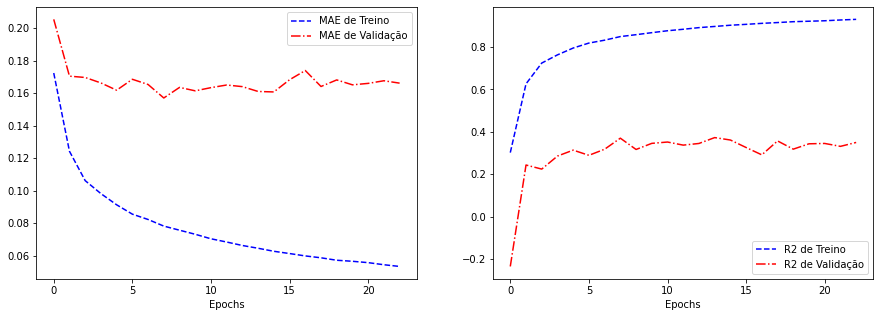

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b--', label = 'MAE de Treino')
plt.plot(history.history['val_loss'], 'r-.', label = 'MAE de Validação')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['coeff_determination'], 'b--', label = 'R2 de Treino')
plt.plot(history.history['val_coeff_determination'], 'r-.', label = 'R2 de Validação')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [111]:
model.save_weights('/content/drive/My Drive/weights_250_epochs.h5')


In [112]:
model.save('/content/drive/My Drive/vgg_250_epochs')

INFO:tensorflow:Assets written to: /content/drive/My Drive/vgg_250_epochs/assets


In [113]:
y_test_predicted = model.predict(test_generator)


In [115]:
np.square(df_test.values - y_test_predicted).mean()


0.04855997622485081

mse: 0.04855997622485081